In [6]:
bsc = xr.open_dataset("nc_files/NMMBMONARCH/2021120112_3H_NMMB-BSC.nc")
bsc


<xarray.Dataset>
Dimensions:     (lat: 825, lon: 1650, time: 25)
Coordinates:
  * lat         (lat) float64 -11.0 -10.9 -10.8 -10.7 ... 71.1 71.2 71.3 71.4
  * lon         (lon) float64 -63.0 -62.9 -62.8 -62.7 ... 101.7 101.8 101.9
  * time        (time) datetime64[ns] 2021-12-01T12:00:00 ... 2021-12-04T12:0...
Data variables:
    od550_dust  (time, lat, lon) float32 ...
    sconc_dust  (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    history:                    Thu Dec  2 00:15:12 2021: ncks -v sconc_dust,...
    Conventions:                CF-1.6
    comment:                    Generated on marenostrum4
    NCO:                        netCDF Operators version 4.9.5 (Homepage = ht...
    history_of_appended_files:  Wed Dec  1 20:54:11 2021: Appended file od550...
    cdo_openmp_thread_number:   4
    CDO:                        Climate Data Operators version 1.9.8 (https:/...

In [7]:
# 7 15 
bsc.time.to_series()[15]

Timestamp('2021-12-03 09:00:00')

In [8]:
nc_files = os.listdir("nc_files/NMMBMONARCH/")
len(nc_files)

57

## NMMBMONARCH

In [9]:
day1_lead_all = pd.DataFrame(columns=["stn", "lon", "lat"])
for nc_file in nc_files:
    bsc = xr.open_dataset("nc_files/NMMBMONARCH/"+nc_file)
    day1_lead = [["stn", "lon", "lat", bsc.od550_dust.time.to_series()[15]]]
    for i in range(len(stn)):
        day1_bsc = bsc.od550_dust.isel(time = 15).sel(lat = stn_lat[i], 
                                                     lon = stn_lon[i], 
                                                     method = 'nearest')
        day1_lead.append([stn[i], stn_lon[i], stn_lat[i], day1_bsc.to_dict()["data"]])
    day1_lead = pd.DataFrame(day1_lead[1:len(day1_lead)], columns = day1_lead[0])
    day1_lead_all = day1_lead_all.merge(day1_lead, 
                                        left_on=["stn", "lon", "lat"], 
                                        right_on=["stn", "lon", "lat"],
                                        how = "outer")
#data for 1 day leadtime for all sations
day1_lead_all

,stn,lon,lat,2021-12-03 09:00:00,2021-12-04 09:00:00,2021-12-05 09:00:00,2021-12-06 09:00:00,2021-12-07 09:00:00,2021-12-08 09:00:00,2021-12-09 09:00:00,...,2022-01-24 09:00:00,2022-01-25 09:00:00,2022-01-26 09:00:00,2022-01-27 09:00:00,2022-01-28 09:00:00,2022-01-29 09:00:00,2022-01-30 09:00:00,2022-01-31 09:00:00,2022-02-01 09:00:00,2022-02-02 09:00:00
0,ABE,3.33,7.20,0.187704,0.324275,0.304392,0.448732,0.349214,0.400055,0.232223,...,0.486492,0.458154,0.623595,0.492587,0.406136,1.121777,0.756640,0.637017,0.614335,0.435791
1,ABK,8.19,6.25,0.485789,0.476518,0.389797,0.380174,0.343208,0.241524,0.423671,...,0.337372,0.505304,0.563412,0.083779,0.238543,0.686223,0.634401,0.536347,0.496610,0.487200
2,ABU,7.20,9.00,0.351621,0.510602,0.569710,0.470474,0.330899,0.410929,0.490440,...,0.664849,0.640804,0.806985,0.471982,1.084910,0.861862,0.427003,0.489030,0.452897,0.534420
3,ADO,5.20,7.60,0.440447,0.329809,0.332931,0.341537,0.343103,0.346610,0.443978,...,0.527444,0.395563,0.592579,0.575314,0.646355,1.068814,0.627916,0.460619,0.492524,0.390960
4,AKU,5.30,7.20,0.436145,0.372696,0.372683,0.391183,0.225960,0.179102,0.326315,...,0.523226,0.414645,0.619554,0.598065,0.595785,0.971226,0.661389,0.420833,0.543157,0.370445
5,ASA,6.23,6.82,0.428392,0.251878,0.257019,0.408398,0.342845,0.203398,0.331351,...,0.473425,0.458433,0.544196,0.473211,0.735383,0.894292,0.561769,0.416279,0.536230,0.351453
6,AWK,7.07,6.20,0.559407,0.504163,0.431567,0.351822,0.366447,0.295254,0.502427,...,0.413585,0.429735,0.516563,0.390583,0.446616,0.850904,0.575256,0.571768,0.490120,0.398038
7,BAU,9.82,10.28,0.627227,0.553535,0.470679,0.538160,0.522856,0.512023,0.595259,...,0.386977,0.643364,0.605256,0.770858,0.792360,0.588987,0.357663,0.408794,0.916783,0.631395
8,BEN,5.60,6.33,0.422801,0.221993,0.373397,0.314116,0.351215,0.141123,0.343178,...,0.518486,0.429189,0.542069,0.592363,0.718838,0.818460,0.592558,0.448719,0.566867,0.403054
9,BID,6.00,9.80,0.624057,0.698177,0.540730,0.495929,0.503090,0.718448,0.761190,...,0.830773,0.720661,0.843451,1.101475,1.624687,0.987745,0.456177,0.404705,0.603718,0.807511


In [10]:
day1_lead_all_t = day1_lead_all.transpose()
day1_lead_all_t.columns = day1_lead_all_t.iloc[0]
day1_lead_all_t = day1_lead_all_t.drop(["lon", "lat", "stn"])

# multiply AOD by 10
# day1_lead_all_t = day1_lead_all_t * 10

day1_lead_all_t = day1_lead_all_t.reset_index()
day1_lead_all_t

stn,index,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
0,2021-12-03 09:00:00,0.187704,0.485789,0.351621,0.440447,0.436145,0.428392,0.559407,0.627227,0.422801,...,0.503788,0.31473,0.475881,0.483278,0.325044,0.460323,0.668582,0.245673,0.797325,0.496186
1,2021-12-04 09:00:00,0.324275,0.476518,0.510602,0.329809,0.372696,0.251878,0.504163,0.553535,0.221993,...,0.584343,0.365513,0.610839,0.470635,0.447344,0.443599,0.565741,0.442672,0.533388,0.289383
2,2021-12-05 09:00:00,0.304392,0.389797,0.56971,0.332931,0.372683,0.257019,0.431567,0.470679,0.373397,...,0.358655,0.473939,0.553853,0.421406,0.434156,0.524824,0.722457,0.520768,0.487654,0.474498
3,2021-12-06 09:00:00,0.448732,0.380174,0.470474,0.341537,0.391183,0.408398,0.351822,0.53816,0.314116,...,0.495637,0.360082,0.60612,0.429984,0.377109,0.300622,0.651179,0.41508,0.556513,0.53322
4,2021-12-07 09:00:00,0.349214,0.343208,0.330899,0.343103,0.22596,0.342845,0.366447,0.522856,0.351215,...,0.476076,0.391278,0.535775,0.340376,0.290897,0.345901,0.497775,0.307431,0.394514,0.452737
5,2021-12-08 09:00:00,0.400055,0.241524,0.410929,0.34661,0.179102,0.203398,0.295254,0.512023,0.141123,...,0.37706,0.41099,0.551792,0.321385,0.303109,0.40604,0.649904,0.35105,0.498055,0.618069
6,2021-12-09 09:00:00,0.232223,0.423671,0.49044,0.443978,0.326315,0.331351,0.502427,0.595259,0.343178,...,0.55455,0.469224,0.418711,0.400306,0.44234,0.561021,0.462044,0.508206,0.732668,0.691638
7,2021-12-10 09:00:00,0.316819,0.535085,0.517058,0.497446,0.5032,0.407744,0.733522,0.463212,0.344936,...,0.312166,0.556627,0.489372,0.50943,0.369715,0.349547,0.343939,0.501641,0.51379,0.507393
8,2021-12-11 09:00:00,0.510499,0.470714,0.695401,0.510616,0.529359,0.613444,0.240823,0.486546,0.36932,...,0.312065,0.54369,0.441197,0.422069,0.266506,0.345382,0.713751,0.411695,0.363107,0.578989
9,2021-12-12 09:00:00,0.430299,0.338799,0.361324,0.439093,0.439264,0.390351,0.374108,0.338296,0.488906,...,0.316394,0.455236,0.328211,0.332141,0.202956,0.334493,0.599311,0.292175,0.206873,0.350056


In [11]:
day1_lead_all_t["index"] = pd.to_datetime(day1_lead_all_t["index"], format="%Y-%m-%d").dt.date
day1_lead_all_t = day1_lead_all_t.set_index("index")
day1_lead_all_t

stn,ABE,ABK,ABU,ADO,AKU,ASA,AWK,BAU,BEN,BID,...,POT,SHA,SOK,UMU,UYO,WAR,YEL,YEN,YOL,ZAR
index,,,,,,,,,,,,,,,,,,,,,
2021-12-03,0.187704,0.485789,0.351621,0.440447,0.436145,0.428392,0.559407,0.627227,0.422801,0.624057,...,0.503788,0.31473,0.475881,0.483278,0.325044,0.460323,0.668582,0.245673,0.797325,0.496186
2021-12-04,0.324275,0.476518,0.510602,0.329809,0.372696,0.251878,0.504163,0.553535,0.221993,0.698177,...,0.584343,0.365513,0.610839,0.470635,0.447344,0.443599,0.565741,0.442672,0.533388,0.289383
2021-12-05,0.304392,0.389797,0.56971,0.332931,0.372683,0.257019,0.431567,0.470679,0.373397,0.54073,...,0.358655,0.473939,0.553853,0.421406,0.434156,0.524824,0.722457,0.520768,0.487654,0.474498
2021-12-06,0.448732,0.380174,0.470474,0.341537,0.391183,0.408398,0.351822,0.53816,0.314116,0.495929,...,0.495637,0.360082,0.60612,0.429984,0.377109,0.300622,0.651179,0.41508,0.556513,0.53322
2021-12-07,0.349214,0.343208,0.330899,0.343103,0.22596,0.342845,0.366447,0.522856,0.351215,0.50309,...,0.476076,0.391278,0.535775,0.340376,0.290897,0.345901,0.497775,0.307431,0.394514,0.452737
2021-12-08,0.400055,0.241524,0.410929,0.34661,0.179102,0.203398,0.295254,0.512023,0.141123,0.718448,...,0.37706,0.41099,0.551792,0.321385,0.303109,0.40604,0.649904,0.35105,0.498055,0.618069
2021-12-09,0.232223,0.423671,0.49044,0.443978,0.326315,0.331351,0.502427,0.595259,0.343178,0.76119,...,0.55455,0.469224,0.418711,0.400306,0.44234,0.561021,0.462044,0.508206,0.732668,0.691638
2021-12-10,0.316819,0.535085,0.517058,0.497446,0.5032,0.407744,0.733522,0.463212,0.344936,0.653173,...,0.312166,0.556627,0.489372,0.50943,0.369715,0.349547,0.343939,0.501641,0.51379,0.507393
2021-12-11,0.510499,0.470714,0.695401,0.510616,0.529359,0.613444,0.240823,0.486546,0.36932,0.891437,...,0.312065,0.54369,0.441197,0.422069,0.266506,0.345382,0.713751,0.411695,0.363107,0.578989


In [12]:
# na.array(vis['YOL'])
# merged = pd.merge(vis[["YOL"]], day1_lead_all_t[["YOL"]], left_index=True, right_on="index")
merged = pd.concat([vis[["YOL"]], day1_lead_all_t[["YOL"]]], axis=1)
merged.columns = ["Visibility", "AOD"]
merged

,Visibility,AOD
2021-12-01,10.0,NaN
2021-12-02,1.0,NaN
2021-12-03,1.6,0.797325
2021-12-04,2.0,0.533388
2021-12-05,5.0,0.487654
...,...,...
2022-01-29,5.0,0.600387
2022-01-30,5.0,0.56072
2022-01-31,8.0,0.461457
2022-02-01,NaN,0.777684


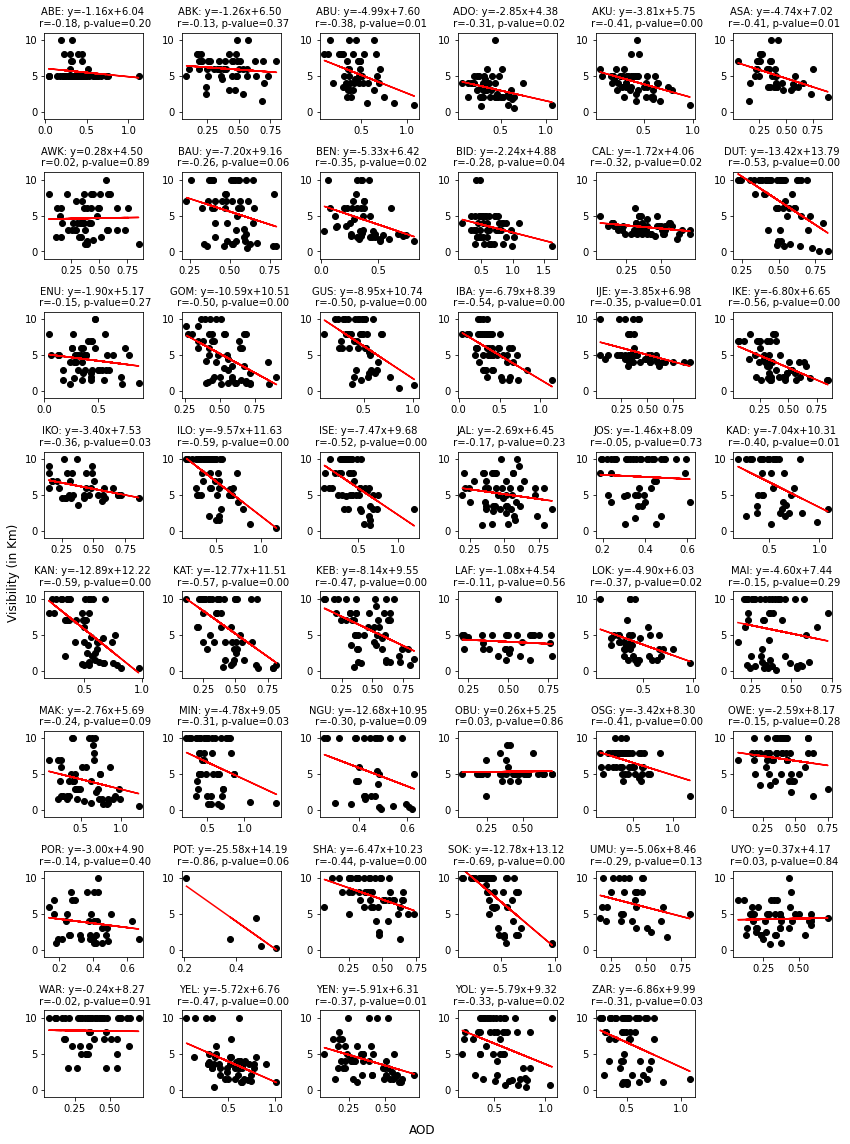

In [13]:
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

cor_ls = []

fig = plt.figure(figsize=(12,16))
# fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, j in enumerate(stn):
    merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
    merged.columns = ["Visibility", "AOD"]
    a=merged.dropna()
#     regression part
    slope, intercept, r_value, p_value, std_err = stats.linregress(list(a['AOD']),list(a['Visibility']))
    line = (slope*a['AOD'])+intercept
    
    # append correlation
    cor_ls.append([stn_lat[i], stn_lon[i], j, round(r_value, 2), round(p_value, 2)])
    
    ax = fig.add_subplot(8,6,i+1, )
    ax.scatter(merged['AOD'], merged['Visibility'], color = 'k')
    ax.plot(list(a['AOD']), line, 'r')
    title = j+': y={:.2f}x+{:.2f} \n '.format(slope,intercept)  + 'r={:.2f}, '.format(r_value) + 'p-value={:.2f}'.format(p_value)

    ax.set_title(title, fontsize = 10)
#     ax.set_xlim([0, 1.5])
    ax.set_ylim([-1, 11])
    
#     ax.set_ylabel('Visibility (in Km)')
#     ax.set_xlabel('bbb')
# fig.suptitle('a')
fig.supxlabel('AOD')
fig.supylabel('Visibility (in Km)')
fig.tight_layout(rect=(0.0,0,1,1))
    
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")    
#     plt.subplot(7,7,i+1)
#     plt.scatter(merged['AOD'], merged['Visibility'], color = 'k', ls='solid')
#     plt.title(j)
# plt.xlabel('AOD')
# plt.ylabel('Visibility (in Km)')
#     plt.text(j)
#     for j in stn:
        
#         plt.subplot(2, 3, i)
#         plt.scatter(merged['AOD'], merged['Visibility'])
# # #         plt.text(0.5, 0.5, str((2, 3, i)),
# # #                  fontsize=18, ha='center')
            


# # fig = plt.figure(figsize=(3,3))
# fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(15,15))
# plt.subplots_adjust(hspace=0.2)
# for j, ax in zip(stn, axs.ravel()):
#     print(j, ax)
#     merged = pd.concat([vis[[j]], day1_lead_all_t[[j]]], axis=1)
#     merged.columns = ["Visibility", "AOD"]
# #     merged['AOD'].scatter(merged['Visibility'],ax=ax)
#     plt.scatter(merged['AOD'], merged['Visibility'],ax=ax)
# #     plt.figure()
# #     plt.scatter(merged['AOD'], merged['Visibility'],color='k', ls='solid')
# #     plt.show()
    
    

In [14]:
cor_df = pd.DataFrame(cor_ls, columns=["Lat", "Long", "Station", "r_value", "p_value"])
cor_df['p'] = 2
cor_df.loc[cor_df['p_value'] > 0.05, 'p'] = 1
cor_df

,Lat,Long,Station,r_value,p_value,p
0,7.20,3.33,ABE,-0.18,0.20,1
1,6.25,8.19,ABK,-0.13,0.37,1
2,9.00,7.20,ABU,-0.38,0.01,2
3,7.60,5.20,ADO,-0.31,0.02,2
4,7.20,5.30,AKU,-0.41,0.00,2
5,6.82,6.23,ASA,-0.41,0.01,2
6,6.20,7.07,AWK,0.02,0.89,1
7,10.28,9.82,BAU,-0.26,0.06,1
8,6.33,5.60,BEN,-0.35,0.02,2
9,9.80,6.00,BID,-0.28,0.04,2


In [15]:
# cor_df.to_csv("cor_files/day1/nmmb_monarch_1d.csv", index=False)
cor_df.to_csv("cor_files/day2/nmmb_monarch_2d.csv", index=False)
# cor_df.to_csv("cor_files/day3/nmmb_monarch_3d.csv", index=False)

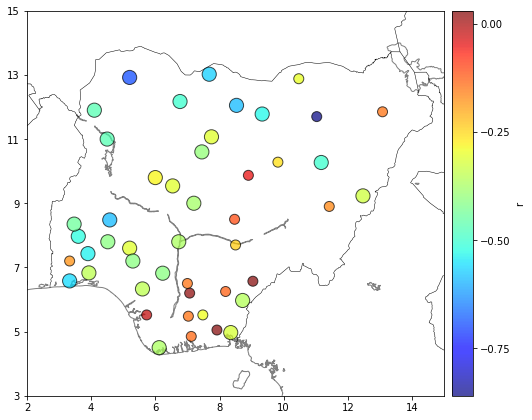

In [16]:
# plot coastlines with Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='cyl', resolution='h',
llcrnrlat=3, urcrnrlat=15,
llcrnrlon=2, urcrnrlon=15)
# m.drawmapboundary(fill_color='#DDEEFF')
# m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='grey', zorder=2)
m.drawcountries(color='black', zorder=2)
# m.shadedrelief()
m.drawstates()

# m.readshapefile('./nigeria_states/nigeria_states', 'nigeria_states')

# plot locations
m.scatter(cor_df["Long"], cor_df["Lat"], latlon=True, 
          c=cor_df["r_value"], s=cor_df["p"]*100,
          edgecolors="black", zorder=3,
          cmap='jet', alpha=0.7)

# create colorbar and legend
m.colorbar(label=r'r', ticks=np.linspace(1, -1, 9), shrink=0.755)
# plt.set_ticks(np.linspace(1, -1, 9))
plt.xticks(range(2, 16, 2))
plt.yticks(range(3, 16, 2))
plt.show()